In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
flood_comm_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
flood_comm_stack_df = pd.DataFrame(flood_comm_df[flood_comm_df.columns.values[1:]].stack()).reset_index()
flood_comm_stack_df = flood_comm_stack_df.rename(columns={'level_0':'Date','level_1':'Community Area',0:'Count Calls'})
flood_comm_totals = pd.DataFrame(flood_comm_stack_df.groupby(['Community Area'])['Count Calls'].sum()).reset_index()
flood_comm_totals.head()

,Community Area,Count Calls
0,ALBANY PARK,1949
1,ARCHER HEIGHTS,720
2,ARMOUR SQUARE,216
3,ASHBURN,4115
4,AUBURN GRESHAM,5565


In [3]:
ihs_df = pd.read_csv('ihs_data/combined_ihs_data.csv')
ihs_df['Community Area'] = ihs_df['Community Area'].str.upper().apply(lambda x: re.sub(r'[^A-Z ]+', '', x))
ihs_df.head()

,Community Area,Percentage_Foreclosed_Parcels,Foreclosure_Filings_05_15,Foreclosures_per_Parcel_Mean_05_15,Share_Low_Value_Mean_05_15,Vacant_Percent_Mean_10_15
0,ALBANY PARK,20.1,1679,2.045455,0.463636,1.810
1,ARCHER HEIGHTS,20.7,623,2.318182,0.400000,1.245
2,ARMOUR SQUARE,3.5,106,0.345455,0.700000,0.780
3,ASHBURN,27.2,4028,3.300000,0.527273,0.990
4,AUBURN GRESHAM,30.7,4115,3.727273,8.109091,3.235


In [4]:
flood_ihs_df = flood_comm_totals.merge(ihs_df, on='Community Area')
print(flood_ihs_df.info(verbose=True))
flood_ihs_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 7 columns):
Community Area                        77 non-null object
Count Calls                           77 non-null int64
Percentage_Foreclosed_Parcels         77 non-null float64
Foreclosure_Filings_05_15             77 non-null int64
Foreclosures_per_Parcel_Mean_05_15    77 non-null float64
Share_Low_Value_Mean_05_15            77 non-null float64
Vacant_Percent_Mean_10_15             77 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.8+ KB
None


,Community Area,Count Calls,Percentage_Foreclosed_Parcels,Foreclosure_Filings_05_15,Foreclosures_per_Parcel_Mean_05_15,Share_Low_Value_Mean_05_15,Vacant_Percent_Mean_10_15
0,ALBANY PARK,1949,20.1,1679,2.045455,0.463636,1.810
1,ARCHER HEIGHTS,720,20.7,623,2.318182,0.400000,1.245
2,ARMOUR SQUARE,216,3.5,106,0.345455,0.700000,0.780
3,ASHBURN,4115,27.2,4028,3.300000,0.527273,0.990
4,AUBURN GRESHAM,5565,30.7,4115,3.727273,8.109091,3.235


In [5]:
# Because calls can't be measured at a rate, and could change based on size, multiplying all parcel rates by parcel count
parcel_comm_df = pd.read_csv('parcel_data/res_parcel_stats_by_comm.csv')
parcel_comm_df = parcel_comm_df.rename(columns={'CommunityArea': 'Community Area'})
parcel_comm_df = parcel_comm_df[['Community Area', 'MeanBldgAge', 'ParcelCount', 'MeanBldgValue']]
flood_parcel_df = flood_ihs_df.merge(parcel_comm_df, on='Community Area')
flood_parcel_df.head()

,Community Area,Count Calls,Percentage_Foreclosed_Parcels,Foreclosure_Filings_05_15,Foreclosures_per_Parcel_Mean_05_15,Share_Low_Value_Mean_05_15,Vacant_Percent_Mean_10_15,MeanBldgAge,ParcelCount,MeanBldgValue
0,ALBANY PARK,1949,20.1,1679,2.045455,0.463636,1.810,88.012670,6314,31204.790624
1,ARCHER HEIGHTS,720,20.7,623,2.318182,0.400000,1.245,71.006517,2762,14332.396452
2,ARMOUR SQUARE,216,3.5,106,0.345455,0.700000,0.780,64.962375,1701,32358.594944
3,ASHBURN,4115,27.2,4028,3.300000,0.527273,0.990,58.554936,12369,12046.872100
4,AUBURN GRESHAM,5565,30.7,4115,3.727273,8.109091,3.235,83.526665,11457,11237.561404


In [6]:
flood_parcel_df['Est_Foreclosed_Parcels'] = flood_parcel_df['Percentage_Foreclosed_Parcels']*flood_parcel_df['ParcelCount']
flood_parcel_df['Est_Low_Value_Parcels'] = flood_parcel_df['Share_Low_Value_Mean_05_15']*flood_parcel_df['ParcelCount']
flood_parcel_df['Est_Vacant_Parcels'] = flood_parcel_df['Vacant_Percent_Mean_10_15']*flood_parcel_df['ParcelCount']
flood_parcel_df.head()

,Community Area,Count Calls,Percentage_Foreclosed_Parcels,Foreclosure_Filings_05_15,Foreclosures_per_Parcel_Mean_05_15,Share_Low_Value_Mean_05_15,Vacant_Percent_Mean_10_15,MeanBldgAge,ParcelCount,MeanBldgValue,Est_Foreclosed_Parcels,Est_Low_Value_Parcels,Est_Vacant_Parcels
0,ALBANY PARK,1949,20.1,1679,2.045455,0.463636,1.810,88.012670,6314,31204.790624,126911.4,2927.400000,11428.340
1,ARCHER HEIGHTS,720,20.7,623,2.318182,0.400000,1.245,71.006517,2762,14332.396452,57173.4,1104.800000,3438.690
2,ARMOUR SQUARE,216,3.5,106,0.345455,0.700000,0.780,64.962375,1701,32358.594944,5953.5,1190.700000,1326.780
3,ASHBURN,4115,27.2,4028,3.300000,0.527273,0.990,58.554936,12369,12046.872100,336436.8,6521.836364,12245.310
4,AUBURN GRESHAM,5565,30.7,4115,3.727273,8.109091,3.235,83.526665,11457,11237.561404,351729.9,92905.854545,37063.395


In [7]:
flood_parcel_df.corr()

,Count Calls,Percentage_Foreclosed_Parcels,Foreclosure_Filings_05_15,Foreclosures_per_Parcel_Mean_05_15,Share_Low_Value_Mean_05_15,Vacant_Percent_Mean_10_15,MeanBldgAge,ParcelCount,MeanBldgValue,Est_Foreclosed_Parcels,Est_Low_Value_Parcels,Est_Vacant_Parcels
Count Calls,1.000000,0.360443,0.840256,0.444209,0.214122,0.060193,0.238679,0.741380,-0.196189,0.880431,0.615493,0.741738
Percentage_Foreclosed_Parcels,0.360443,1.000000,0.414250,0.983092,0.612905,0.518561,0.512697,0.011127,-0.312872,0.524502,0.510479,0.521557
Foreclosure_Filings_05_15,0.840256,0.414250,1.000000,0.453825,0.159670,0.049018,0.242210,0.732517,-0.059611,0.920107,0.566437,0.751155
Foreclosures_per_Parcel_Mean_05_15,0.444209,0.983092,0.453825,1.000000,0.640361,0.508851,0.545288,0.081550,-0.337073,0.586971,0.568269,0.581432
Share_Low_Value_Mean_05_15,0.214122,0.612905,0.159670,0.640361,1.000000,0.854565,0.295879,-0.106591,-0.167772,0.248000,0.685134,0.537957
Vacant_Percent_Mean_10_15,0.060193,0.518561,0.049018,0.508851,0.854565,1.000000,0.250457,-0.195650,-0.115928,0.100581,0.381192,0.386605
MeanBldgAge,0.238679,0.512697,0.242210,0.545288,0.295879,0.250457,1.000000,0.253057,-0.498034,0.402310,0.303563,0.468862
ParcelCount,0.741380,0.011127,0.732517,0.081550,-0.106591,-0.195650,0.253057,1.000000,-0.227431,0.779059,0.313245,0.561717
MeanBldgValue,-0.196189,-0.312872,-0.059611,-0.337073,-0.167772,-0.115928,-0.498034,-0.227431,1.000000,-0.252083,-0.155569,-0.208175
Est_Foreclosed_Parcels,0.880431,0.524502,0.920107,0.586971,0.248000,0.100581,0.402310,0.779059,-0.252083,1.000000,0.630384,0.804195


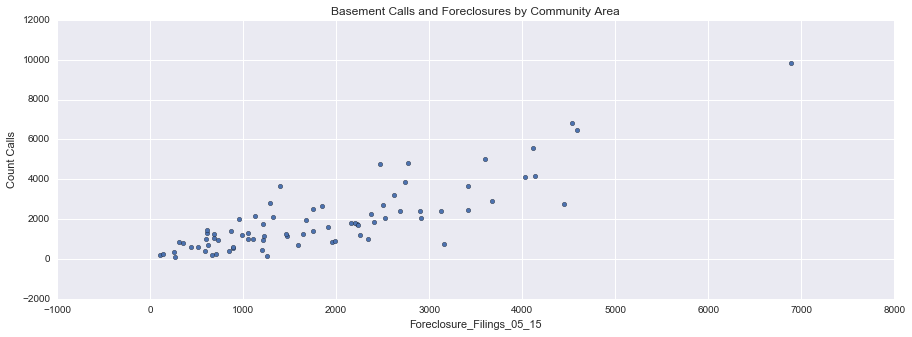

In [9]:
plt.rcParams["figure.figsize"] = [15, 5]
flood_parcel_df.plot(kind='scatter', 
                     title='Basement Calls and Foreclosures by Community Area', 
                     x='Foreclosure_Filings_05_15',
                     y='Count Calls')